In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Automobile_data.csv")

# Replace "?" with NaN and drop missing values
df = df.replace("?", np.nan)
df = df.dropna()

# Define 9 selected features and ensure 'price' is included
selected_features = [
    'horsepower',
    'curb-weight',
    'engine-size',
    'highway-mpg',
    'length',
    'width',
    'height',
    'compression-ratio',
    'city-mpg'
]

# Ensure these columns and 'price' are numeric
df[selected_features + ['price']] = df[selected_features + ['price']].astype(float)

# Set features and target
X = df[selected_features]
y = df['price']


In [4]:
# Example: Fill numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


NameError: name 'numeric_cols' is not defined

In [5]:
df["num-of-doors"] = df["num-of-doors"].map({"two": 2, "four": 4})


In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for gradient descent
X_train_np = X_train
y_train_np = y_train.to_numpy()
X_val_np = X_val
y_val_np = y_val.to_numpy()


In [10]:
def mean_squared_error_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [11]:
epochs = 1000
learning_rate = 0.01
batch_size = 32
n_features = X_train_np.shape[1]
weights = np.zeros(n_features)
bias = 0
train_loss_history = []
val_loss_history = []

# Early Stopping setup
patience = 10
best_val_loss = float('inf')
counter = 0

for epoch in range(epochs):
    permutation = np.random.permutation(X_train_np.shape[0])
    X_train_shuffled = X_train_np[permutation]
    y_train_shuffled = y_train_np[permutation]

    for i in range(0, X_train_np.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        y_pred = np.dot(X_batch, weights) + bias
        error = y_pred - y_batch

        dw = np.dot(X_batch.T, error) / len(X_batch)
        db = np.sum(error) / len(X_batch)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Compute train and validation loss
    train_predictions = np.dot(X_train_np, weights) + bias
    val_predictions = np.dot(X_val_np, weights) + bias
    train_loss = mean_squared_error(y_train_np, train_predictions)
    val_loss = mean_squared_error(y_val_np, val_predictions)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    # Early Stopping Condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break


Epoch 1: Train Loss = 150228494.6817, Val Loss = 118772278.6761
Epoch 2: Train Loss = 132562428.0720, Val Loss = 108155837.6853
Epoch 3: Train Loss = 118710446.6528, Val Loss = 99652487.3619
Epoch 4: Train Loss = 107667545.3445, Val Loss = 92416326.6186
Epoch 5: Train Loss = 98364810.6676, Val Loss = 86007734.2266
Epoch 6: Train Loss = 90335164.9059, Val Loss = 80216960.4356
Epoch 7: Train Loss = 83260408.3717, Val Loss = 74861270.4236
Epoch 8: Train Loss = 76993796.2722, Val Loss = 69805992.1111
Epoch 9: Train Loss = 71299139.3064, Val Loss = 65209224.0685
Epoch 10: Train Loss = 66131260.6414, Val Loss = 60915572.1019
Epoch 11: Train Loss = 61450582.3803, Val Loss = 56806586.1917
Epoch 12: Train Loss = 57161183.5523, Val Loss = 52972438.0093
Epoch 13: Train Loss = 53211204.5100, Val Loss = 49442611.6369
Epoch 14: Train Loss = 49584505.8909, Val Loss = 46129369.7492
Epoch 15: Train Loss = 46240312.0294, Val Loss = 43042192.6085
Epoch 16: Train Loss = 43171386.5863, Val Loss = 40098659.

In [12]:
def batch_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=1000, reg_lambda=0.01, early_stopping_patience=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias
        error = y_pred - y

        dw = (2 / n_samples) * (np.dot(X.T, error) + reg_lambda * weights)
        db = (2 / n_samples) * np.sum(error)

        weights -= lr * dw
        bias -= lr * db

        train_loss = mean_squared_error_loss(y, np.dot(X, weights) + bias)
        val_loss = mean_squared_error_loss(y_val, np.dot(X_val, weights) + bias)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return weights, bias, history


In [14]:
weights, bias, history = batch_gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=300, reg_lambda=0.1)


Epoch 1, Train Loss: 160700567.2556, Val Loss: 125097428.7368
Epoch 2, Train Loss: 149736507.3881, Val Loss: 118607995.0475
Epoch 3, Train Loss: 140282145.6171, Val Loss: 112988453.0590
Epoch 4, Train Loss: 132039771.8551, Val Loss: 108038145.6324
Epoch 5, Train Loss: 124776118.2503, Val Loss: 103605168.6314
Epoch 6, Train Loss: 118308151.8386, Val Loss: 99574877.8029
Epoch 7, Train Loss: 112492010.1568, Val Loss: 95861037.7245
Epoch 8, Train Loss: 107214384.0843, Val Loss: 92399014.7470
Epoch 9, Train Loss: 102385806.2100, Val Loss: 89140550.0235
Epoch 10, Train Loss: 97935422.9434, Val Loss: 86049752.9422
Epoch 11, Train Loss: 93806921.9712, Val Loss: 83100036.2299
Epoch 12, Train Loss: 89955359.3558, Val Loss: 80271776.8421
Epoch 13, Train Loss: 86344687.1858, Val Loss: 77550535.5429
Epoch 14, Train Loss: 82945826.7588, Val Loss: 74925705.9281
Epoch 15, Train Loss: 79735166.5958, Val Loss: 72389493.0011
Epoch 16, Train Loss: 76693391.3045, Val Loss: 69936144.1727
Epoch 17, Train Los

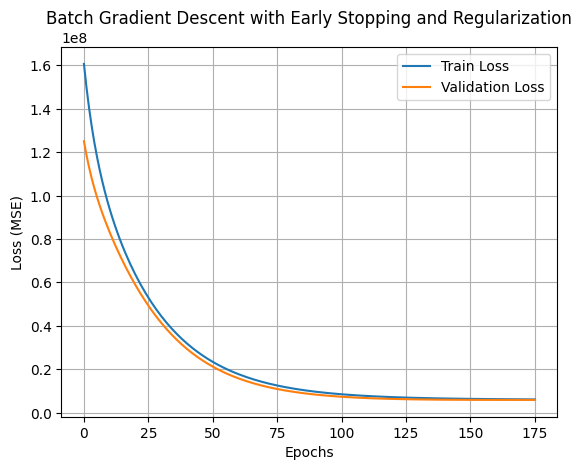

In [15]:
import matplotlib.pyplot as plt

plt.plot(history["train_loss"], label='Train Loss')
plt.plot(history["val_loss"], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Batch Gradient Descent with Early Stopping and Regularization")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
def stochastic_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=100, reg_lambda=0.01, early_stopping_patience=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        for i in range(n_samples):
            # Access data using array indexing instead of .iloc
            xi = X[i].reshape(1, -1)
            # Access y using .iloc to handle potential index mismatches
            yi = y.iloc[i]

            y_pred = np.dot(xi, weights) + bias
            error = y_pred - yi

            dw = 2 * (np.dot(xi.T, error) + reg_lambda * weights)
            db = 2 * error

            weights -= lr * dw.flatten()
            bias -= lr * db.flatten()[0]

        train_pred = np.dot(X, weights) + bias
        val_pred = np.dot(X_val, weights) + bias

        train_loss = mean_squared_error_loss(y, train_pred)
        val_loss = mean_squared_error_loss(y_val, val_pred)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return weights, bias, history

In [17]:
# SGD
w_sgd, b_sgd, hist_sgd = stochastic_gradient_descent(X_train, y_train, X_val, y_val)


Epoch 1, Train Loss: 7153248.6596, Val Loss: 6616159.9069
Epoch 2, Train Loss: 6752485.2702, Val Loss: 7206165.6133
Epoch 3, Train Loss: 6668478.6257, Val Loss: 7354854.4998
Epoch 4, Train Loss: 6609731.0969, Val Loss: 7419609.8207
Epoch 5, Train Loss: 6572384.5649, Val Loss: 7462373.1089
Epoch 6, Train Loss: 6548007.4168, Val Loss: 7490453.6686
Epoch 7, Train Loss: 6531511.2678, Val Loss: 7507667.1632
Epoch 8, Train Loss: 6519989.3095, Val Loss: 7517196.3621
Epoch 9, Train Loss: 6511731.1898, Val Loss: 7521540.2813
Epoch 10, Train Loss: 6505689.6855, Val Loss: 7522537.9247
Epoch 11, Train Loss: 6501197.8462, Val Loss: 7521484.5057
Early stopping at epoch 11


In [18]:
import numpy as np

def mini_batch_gradient_descent(X, y, X_val, y_val, lr=0.01, epochs=100, batch_size=32, reg_lambda=0.01, early_stopping_patience=10):
    """
    Performs mini-batch gradient descent.

    Args:
        X: Training data features.
        y: Training data target.
        X_val: Validation data features.
        y_val: Validation data target.
        lr: Learning rate.
        epochs: Number of epochs.
        batch_size: Batch size.
        reg_lambda: Regularization parameter.
        early_stopping_patience: Patience for early stopping.

    Returns:
        Tuple: (weights, bias, history)
            - weights: Learned weights.
            - bias: Learned bias.
            - history: Dictionary containing training and validation loss history.
    """

    X = X.values if isinstance(X, pd.DataFrame) else X  # Convert to NumPy array if needed
    y = y.values if isinstance(y, pd.Series) else y  # Convert to NumPy array if needed
    X_val = X_val.values if isinstance(X_val, pd.DataFrame) else X_val  # Convert to NumPy array if needed
    y_val = y_val.values if isinstance(y_val, pd.Series) else y_val  # Convert to NumPy array if needed


    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_val_loss = float('inf')
    patience_counter = 0

    history = {
        "train_loss": [],
        "val_loss": []
    }

    for epoch in range(epochs):
        # Shuffle data for each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Calculate predictions and error
            y_pred = np.dot(X_batch, weights) + bias
            error = y_pred - y_batch

            # Calculate gradients
            dw = (2 / batch_size) * (np.dot(X_batch.T, error) + reg_lambda * weights)
            db = (2 / batch_size) * np.sum(error)

            # Update weights and bias
            weights -= lr * dw
            bias -= lr * db

        # Calculate and store losses for the epoch
        train_loss = mean_squared_error_loss(y, np.dot(X, weights) + bias)
        val_loss = mean_squared_error_loss(y_val, np.dot(X_val, weights) + bias)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    return weights, bias, history

In [19]:

# Mini-Batch GD
w_mini, b_mini, hist_mini = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size=32)


Epoch 1, Train Loss: 131606331.3296, Val Loss: 108134529.5912
Epoch 2, Train Loss: 107323762.4895, Val Loss: 92715067.7824
Epoch 3, Train Loss: 90235216.5037, Val Loss: 80554727.5594
Epoch 4, Train Loss: 77036084.9596, Val Loss: 70075180.6649
Epoch 5, Train Loss: 66258434.1717, Val Loss: 61098183.6733
Epoch 6, Train Loss: 57268574.9975, Val Loss: 53194011.4460
Epoch 7, Train Loss: 49672152.7533, Val Loss: 46527309.9741
Epoch 8, Train Loss: 43250225.1232, Val Loss: 40269067.0687
Epoch 9, Train Loss: 37798420.3521, Val Loss: 35053637.0112
Epoch 10, Train Loss: 33151758.6104, Val Loss: 30594772.5580
Epoch 11, Train Loss: 29199857.7320, Val Loss: 26849699.5687
Epoch 12, Train Loss: 25828655.4734, Val Loss: 23587830.9072
Epoch 13, Train Loss: 22947947.0216, Val Loss: 20762358.8184
Epoch 14, Train Loss: 20488313.2707, Val Loss: 18513235.0874
Epoch 15, Train Loss: 18386897.0815, Val Loss: 16507706.7663
Epoch 16, Train Loss: 16594924.3146, Val Loss: 14750112.3027
Epoch 17, Train Loss: 15069257

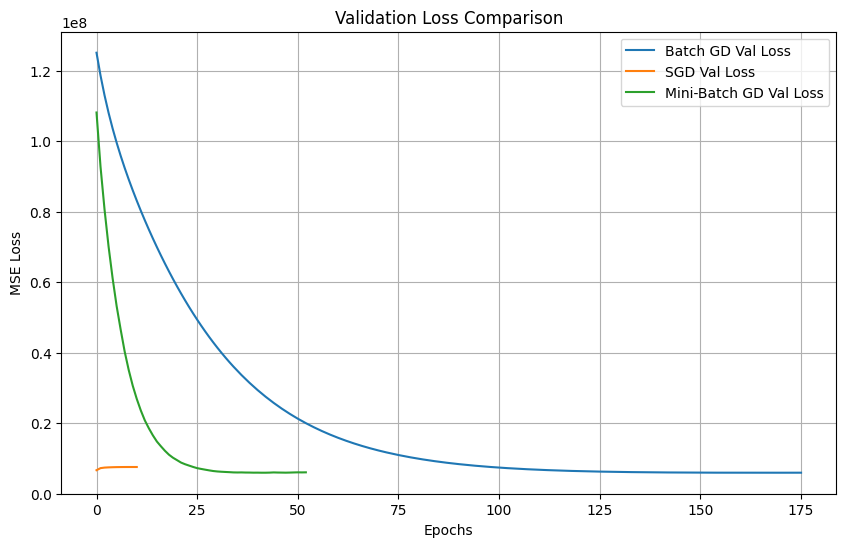

In [20]:
def plot_loss(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history["val_loss"], label=f'{label} Val Loss')
    plt.title("Validation Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss([history, hist_sgd, hist_mini], ['Batch GD', 'SGD', 'Mini-Batch GD'])


In [21]:
from sklearn.model_selection import train_test_split

selected_features = [
    "engine-size", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "curb-weight", "compression-ratio", "bore", "stroke"
]
X = df[selected_features]

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Recreate and refit the pipeline using updated feature set
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Make sure X_train and X_test are both derived from the same selected_features
pipeline.fit(X_train, y_train)  # X_train should have 9 features

# Predict using the updated pipeline
y_pred = pipeline.predict(X_test)  # X_test must also have 9 features

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 5245679.285371969
R2 Score: 0.705209983486384


In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)
print("Poly MSE:", mean_squared_error(y_test, y_pred_poly))


Poly MSE: 10451748.523537654


In [25]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [29]:
from sklearn.linear_model import SGDRegressor # Import SGDRegressor
import joblib # Import the joblib library


selected_features = [
    "engine-size", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "curb-weight", "compression-ratio", "bore", "stroke"
]

X = df[selected_features]
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuild and fit pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SGDRegressor(max_iter=1000, tol=1e-3))
])

pipeline.fit(X_train, y_train)

# Save only this pipeline
joblib.dump(pipeline, "sgd_pipeline_model.pkl")


['sgd_pipeline_model.pkl']

In [27]:
pip install huggingface_hub


In [30]:
from huggingface_hub import HfApi, HfFolder, Repository, upload_file

# Login (run this once manually in Colab)
from huggingface_hub import login
login()  # Enter your token from https://huggingface.co/settings/tokens


In [ ]:
from huggingface_hub import create_repo
create_repo("heerheer/Car_ML")

HfHubHTTPError: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-67f94941-0d03f2d6318bfa2e5ac43a9c;116c4edc-1065-4d80-be2a-c735bfa07574)

You already created this model repo

In [31]:
upload_file(
    path_or_fileobj="sgd_pipeline_model.pkl",
    path_in_repo="sgd_pipeline_model.pkl",
    repo_id="heerheer/Car_ML",  # Create this repo manually first on huggingface.co
    repo_type="model"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sgd_pipeline_model.pkl:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/heerheer/Car_ML/commit/345efe4289c2caaba025b417b57dfc9953d1981b', commit_message='Upload sgd_pipeline_model.pkl with huggingface_hub', commit_description='', oid='345efe4289c2caaba025b417b57dfc9953d1981b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/heerheer/Car_ML', endpoint='https://huggingface.co', repo_type='model', repo_id='heerheer/Car_ML'), pr_revision=None, pr_num=None)

In [32]:

import joblib
from huggingface_hub import hf_hub_download

# List of features required by the model
FEATURE_NAMES = [
    "engine-size", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "curb-weight", "compression-ratio", "bore", "stroke"
]

def get_user_input():
    print("Enter values for the following car features:")
    inputs = []
    for feature in FEATURE_NAMES:
        value = float(input(f"{feature.replace('-', ' ').title()}: "))
        inputs.append(value)
    return inputs

def main():
    print(" Loading model from Hugging Face...")
    model_path = hf_hub_download(repo_id="heerheer/Car_ML", filename="sgd_pipeline_model.pkl")
    model = joblib.load(model_path)
    print(" Model loaded successfully!")

    user_features = get_user_input()
    prediction = model.predict([user_features])[0]
    print(f"💰 Estimated Car Price: ${round(prediction, 2)}")

if __name__ == "__main__":
    main()


 Loading model from Hugging Face...


sgd_pipeline_model.pkl:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

 Model loaded successfully!
Enter values for the following car features:
Engine Size: 100
Horsepower: 455
Peak Rpm: 4567
City Mpg: 456
Highway Mpg: 345
Curb Weight: 456
Compression Ratio: 456
Bore: 45
Stroke: 3
💰 Estimated Car Price: $25875.54


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
import joblib
import numpy as np

# Load the model
model = joblib.load('sgd_pipeline_model.pkl')

def predict(input_array):
    input_scaled = model['scaler'].transform([input_array])
    prediction = np.dot(input_scaled, model['weights']) + model['bias']
    return prediction[0]


In [34]:
pip install wandb


In [36]:
import wandb
from sklearn.metrics import mean_squared_error, r2_score

wandb.init(project="ml-regression-model")

# After training and prediction
wandb.log({
    "mse": mean_squared_error(y_test, y_pred),
    "r2_score": r2_score(y_test, y_pred)
})


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: heer-harish04 (heer-harish04-national-university-of-computing-and-emerg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [37]:
from huggingface_hub import hf_hub_download
import joblib

# Download model from Hugging Face Hub
model_path = hf_hub_download(repo_id="heerheer/Car_ML", filename="sgd_pipeline_model.pkl")

# Load the model
model = joblib.load(model_path)


In [38]:
!pip install flask flask-ngrok pyngrok


In [39]:
!pip install flask-ngrok
!pip install pyngrok


In [ ]:
!pip install pyngrok flask


In [41]:
from pyngrok import conf

conf.get_default().auth_token = "2vaChpTGv5STGgn0md75nXmhtew_4NNM6jfSC3JQGR3zWhYqm"


In [ ]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import joblib
from huggingface_hub import hf_hub_download
import joblib

# Download model from Hugging Face Hub
model_path = hf_hub_download(repo_id="heerheer/Car_ML", filename="sgd_pipeline_model.pkl")

# Load the model
model = joblib.load(model_path)


# Define the expected input features
FEATURE_NAMES = [
    "engine-size",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "curb-weight",
    "compression-ratio",
    "bore",
    "stroke"
]

app = Flask(__name__)

# HTML template
template = '''
<!DOCTYPE html>
<html>
<head>
    <title>Car Price Prediction</title>
    <style>
        body { font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f6f8; padding: 40px; }
        .container { max-width: 800px; margin: auto; background: white; padding: 30px; border-radius: 8px; box-shadow: 0 0 10px rgba(0,0,0,0.1); }
        h2 { color: #2c3e50; text-align: center; }
        form { display: flex; flex-wrap: wrap; justify-content: space-between; }
        .form-group { width: 48%; margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; font-weight: bold; }
        input[type="text"] { width: 100%; padding: 8px; border: 1px solid #ccc; border-radius: 4px; }
        input[type="submit"] { margin-top: 20px; width: 100%; padding: 12px; background-color: #3498db; color: white; border: none; border-radius: 5px; font-size: 16px; cursor: pointer; }
        input[type="submit"]:hover { background-color: #2980b9; }
        .result { text-align: center; margin-top: 20px; font-size: 20px; color: #27ae60; }
    </style>
</head>
<body>
    <div class="container">
        <h2>Car Price Predictor</h2>
        <form method="post">
            {% for feature in features %}
                <div class="form-group">
                    <label>{{ feature.replace('-', ' ').title() }}</label>
                    <input type="text" name="{{ feature }}" required>
                </div>
            {% endfor %}
            <input type="submit" value="Predict Price">
        </form>
        {% if prediction is not none %}
            <div class="result">Estimated Price: ${{ prediction }}</div>
        {% endif %}
    </div>
</body>
</html>
'''

@app.route("/", methods=["GET", "POST"])
def predict():
    prediction = None
    if request.method == "POST":
        try:
            # Read values directly in correct order
            inputs = [float(request.form[feature]) for feature in FEATURE_NAMES]

            # Predict using the full pipeline
            prediction = round(model.predict([inputs])[0], 2)

        except Exception as e:
            prediction = f"Error: {e}"

    return render_template_string(template, prediction=prediction, features=FEATURE_NAMES)

# Start server
public_url = ngrok.connect(5000)
print("🚗 Visit your app at:", public_url)
app.run(port=5000)


🚗 Visit your app at: NgrokTunnel: "https://0b53-35-202-68-50.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
python app.py


SyntaxError: invalid syntax (<ipython-input-87-b851947b46d7>, line 1)